<a href="https://www.kaggle.com/code/hamidmofidi/poincare?scriptVersionId=135214721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The equation of motion for a simple pendulum can be described by the following second-order ordinary differential equation:

θ''(t) + (g/L) * sin(θ(t)) = 0

where:
- θ(t) represents the angle of the pendulum at time t,
- θ''(t) represents the second derivative of θ with respect to time (angular acceleration),
- g is the acceleration due to gravity, and
- L is the length of the pendulum.

This equation states that the angular acceleration of the pendulum is equal to the gravitational acceleration (g) times the sine of the angle (θ) divided by the length of the pendulum (L).

To convert the second-order ordinary differential equation for the simple pendulum into a system of first-order differential equations, we can introduce a new variable to represent the angular velocity of the pendulum. Let's denote this variable as ω(t), which represents the derivative of θ(t) with respect to time.

Now, we can rewrite the equation as a system of first-order differential equations:

\begin{equation}
\left\{
\begin{aligned}
\dfrac{dθ}{dt} =& ω \\
\dfrac{dω}{dt} =& - \dfrac{g}{L} * sin(θ)
\end{aligned}\right.
\end{equation}

where:

dθ/dt represents the rate of change of the angle θ with respect to time (angular velocity),
dω/dt represents the rate of change of the angular velocity ω with respect to time (angular acceleration),
g is the acceleration due to gravity, and L is the length of the pendulum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the derivative of the angle theta:
def pendulum_deriv(theta, g, L):
    return -g/L * np.sin(theta)

# Function to compute the Poincaré map:
# It iterates over a specified number of iterations, integrates the pendulum system 
# for a short time step, and checks if the pendulum crossed the Poincaré section. 
# If it did, it records the angle theta and angular velocity omega for the Poincaré map.
def compute_poincare_map(theta_0, omega_0, g, L, num_iterations):
    poincare_theta = []
    poincare_omega = []

    theta = theta_0
    omega = omega_0

    for _ in range(num_iterations):
        # Integrate the pendulum system for a short time step
        # the following comes from the system of first-order DEs written above 
        dt = 0.01
        theta += omega * dt
        omega += pendulum_deriv(theta, g, L) * dt

        # Check if the pendulum crossed the Poincaré section
        if omega > 0 and omega - pendulum_deriv(theta, g, L) * dt < 0:
            poincare_theta.append(theta)
            poincare_omega.append(omega)

    return poincare_theta, poincare_omega

# Parameters of the pendulum system
g = 9.81  # acceleration due to gravity
L = 1.0   # length of the pendulum

# Initial conditions
theta_0 = 0.1  # initial angle in radians
omega_0 = 0.0  # initial angular velocity

# Number of iterations for the Poincaré map
num_iterations = 1000

# Compute the Poincaré map
poincare_theta, poincare_omega = compute_poincare_map(theta_0, omega_0, g, L, num_iterations)

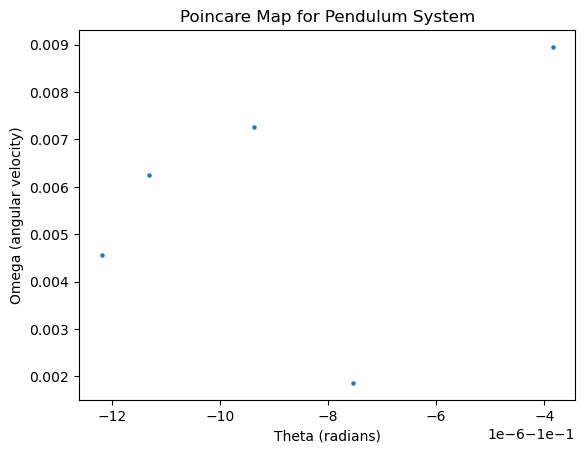

In [2]:
# Plot the Poincaré map
plt.scatter(poincare_theta, poincare_omega, s=5)
plt.xlabel('Theta (radians)')
plt.ylabel('Omega (angular velocity)')
plt.title('Poincare Map for Pendulum System')
plt.show()
# The plot will show the recorded angles and angular velocities of the pendulum 
# at each intersection with the Poincaré section. By analyzing this plot, 
# you can gain insights into the long-term behavior and dynamics of the pendulum system.

By varying the parameters and initial conditions, you can observe how the Poincaré map changes and gain insights into the system's behavior under different conditions. This allows you to explore the presence of stable fixed points, periodic orbits, or chaotic behavior in different regions of the parameter space.

In the following code, I have added loops to iterate over different values of the length of the pendulum (L), gravitational acceleration (g), initial angle (theta0), and initial angular velocity (omega0). For each combination of parameters and initial conditions, the `simple_pendulum` function is called to perform the simulation and obtain the Poincaré map values. The Poincaré map is then plotted for each combination using scatter plots.


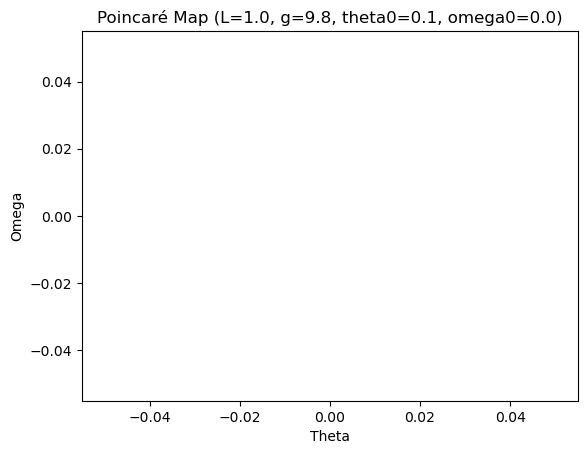

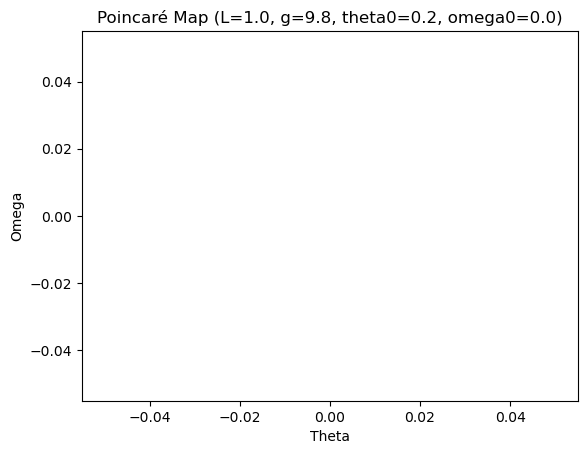

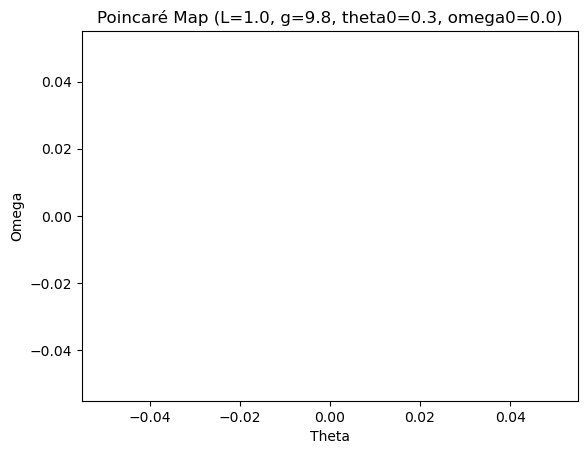

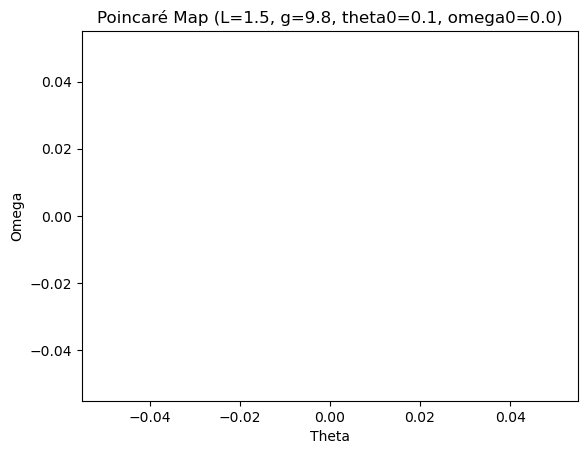

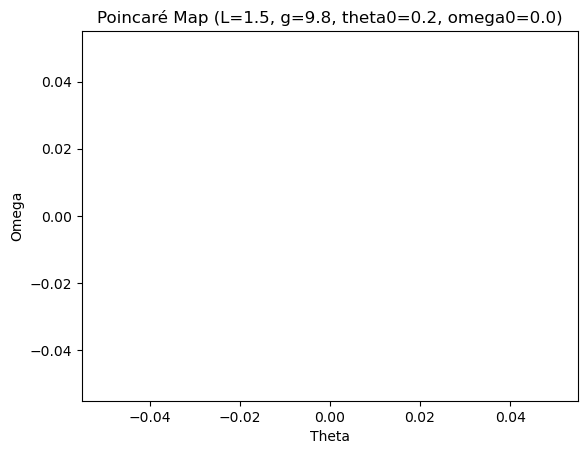

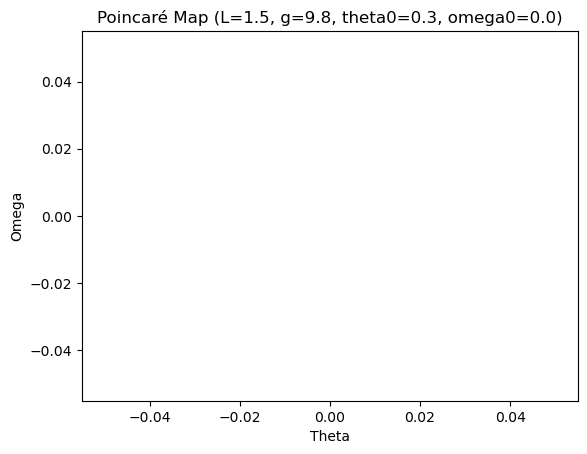

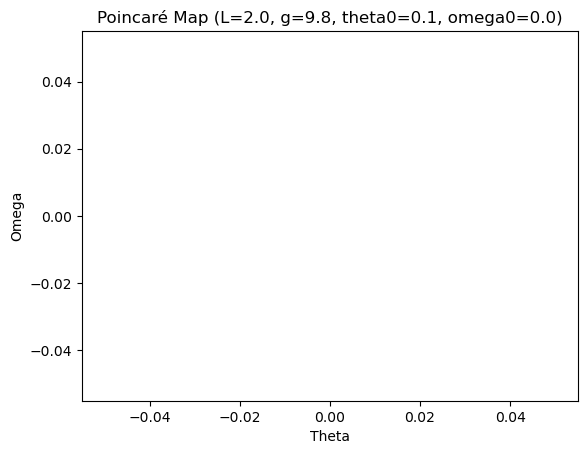

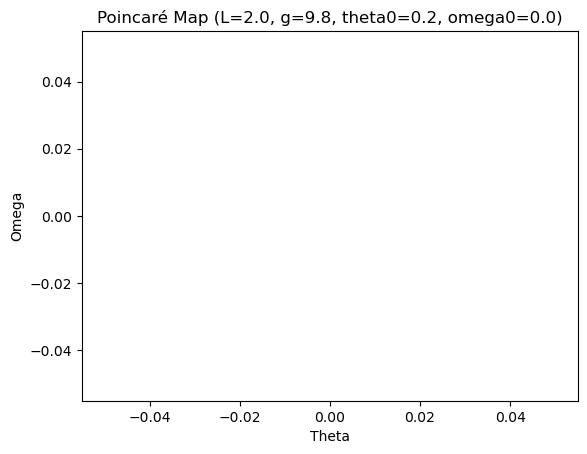

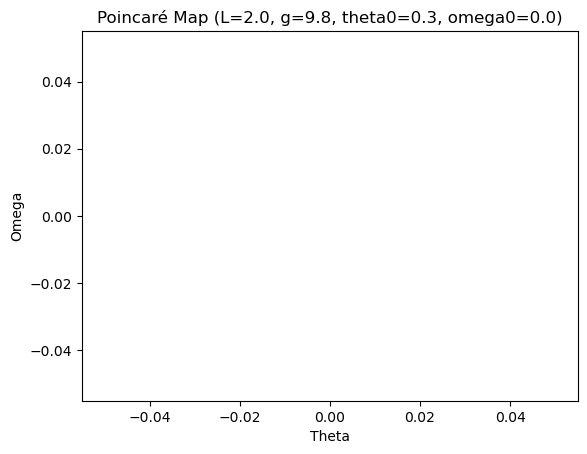

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simple_pendulum(theta0, omega0, L, g, timesteps, section_threshold):
    theta = theta0
    omega = omega0
    poincare_theta = []
    poincare_omega = []
    
    for _ in range(timesteps):
        # Numerical integration using Euler's method
        theta += omega
        omega -= (g / L) * np.sin(theta)
        
        # Check if the pendulum has crossed the Poincaré section
        if np.abs(theta) < section_threshold and omega < 0:
            poincare_theta.append(theta)
            poincare_omega.append(omega)
    
    return poincare_theta, poincare_omega

# Define the range of parameter and initial condition values to explore
L_values = [1.0, 1.5, 2.0]  # Length of the pendulum
g_values = [9.8]  # Gravitational acceleration
theta0_values = [0.1, 0.2, 0.3]  # Initial angle
omega0_values = [0.0]  # Initial angular velocity

# Set other simulation parameters
timesteps = 10000  # Number of iterations
section_threshold = 0.01  # Threshold for the Poincaré section

# Perform simulations for different parameter and initial condition combinations
for L in L_values:
    for g in g_values:
        for theta0 in theta0_values:
            for omega0 in omega0_values:
                poincare_theta, poincare_omega = simple_pendulum(theta0, omega0, L, g, timesteps, section_threshold)
                
                # Plot the Poincaré map for each combination
                plt.scatter(poincare_theta, poincare_omega, s=1)
                plt.xlabel('Theta')
                plt.ylabel('Omega')
                plt.title(f'Poincaré Map (L={L}, g={g}, theta0={theta0}, omega0={omega0})')
                plt.show()